In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# COVID-19 DASHBOARD

In [17]:
repo = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json'
naz = repo + '/dpc-covid19-ita-andamento-nazionale.json'
reg = repo + '/dpc-covid19-ita-regioni.json'
prov = repo + '/dpc-covid19-ita-province.json'
df_naz_raw = pd.read_json(naz, convert_dates=['data'])
df_naz = df_naz_raw.set_index('data')
df_reg_raw = pd.read_json(reg, convert_dates=['data'])
df_reg = df_reg_raw.set_index('data')
df_prov_raw = pd.read_json(prov, convert_dates=['data'])
df_prov = df_prov_raw.set_index('data')

## Lombardia

### Complessivo

,totale_attualmente_positivi,isolamento_domiciliare,ricoverati_con_sintomi,terapia_intensiva,deceduti
data,,,,,
2020-03-11 17:00:00,5763,1351,3852,560,617
2020-03-12 17:00:00,6896,2044,4247,605,744


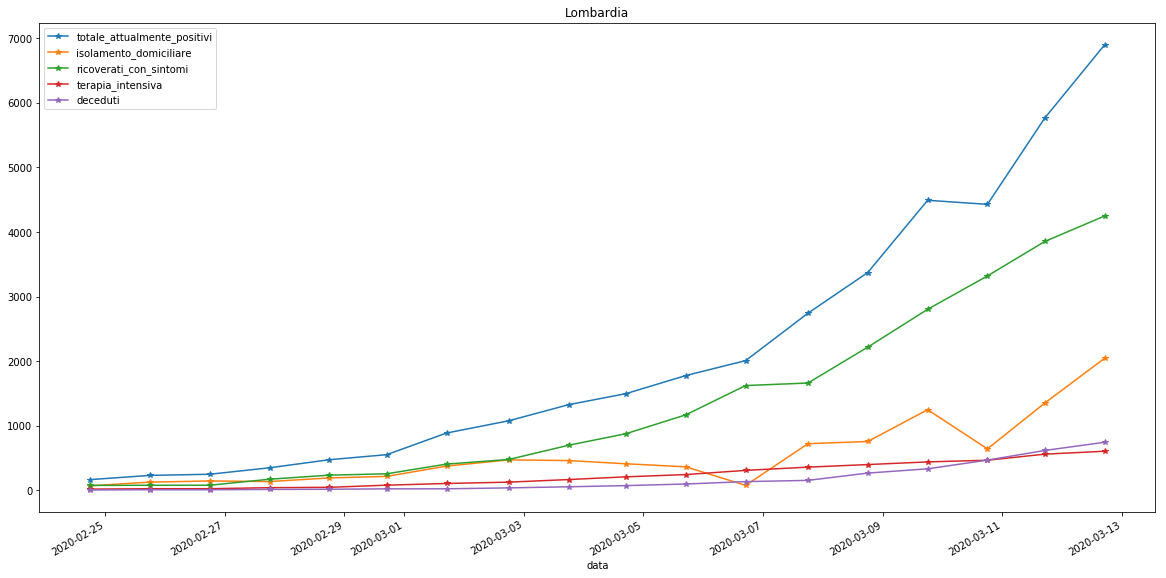

In [20]:
display(df_reg[df_reg['denominazione_regione']=='Lombardia'].loc[df_reg.index.unique()[-2:],
                                                                 ['totale_attualmente_positivi',
                                                                  'isolamento_domiciliare',
                                                                  'ricoverati_con_sintomi',
                                                                  'terapia_intensiva',
                                                                  'deceduti']])
plt.rcParams['figure.figsize'] = [20, 10]
df_reg[df_reg['denominazione_regione']=='Lombardia'].plot(y=['totale_attualmente_positivi',
                                                             'isolamento_domiciliare',
                                                             'ricoverati_con_sintomi',
                                                             'terapia_intensiva',
                                                             'deceduti'],
                                                          title='Lombardia',
                                                          style='*-')
plt.show()

### Dettaglio province

,BG,BS,CO,CR,LC,LO,MN,MI,MB,PV,SO,VA
data,,,,,,,,,,,,
2020-03-11 17:00:00,1815.0,1351.0,77.0,1061.0,113.0,1035.0,137.0,925.0,85.0,403.0,13.0,75.0
2020-03-12 17:00:00,2136.0,1598.0,98.0,1302.0,199.0,1123.0,169.0,1146.0,130.0,468.0,23.0,98.0


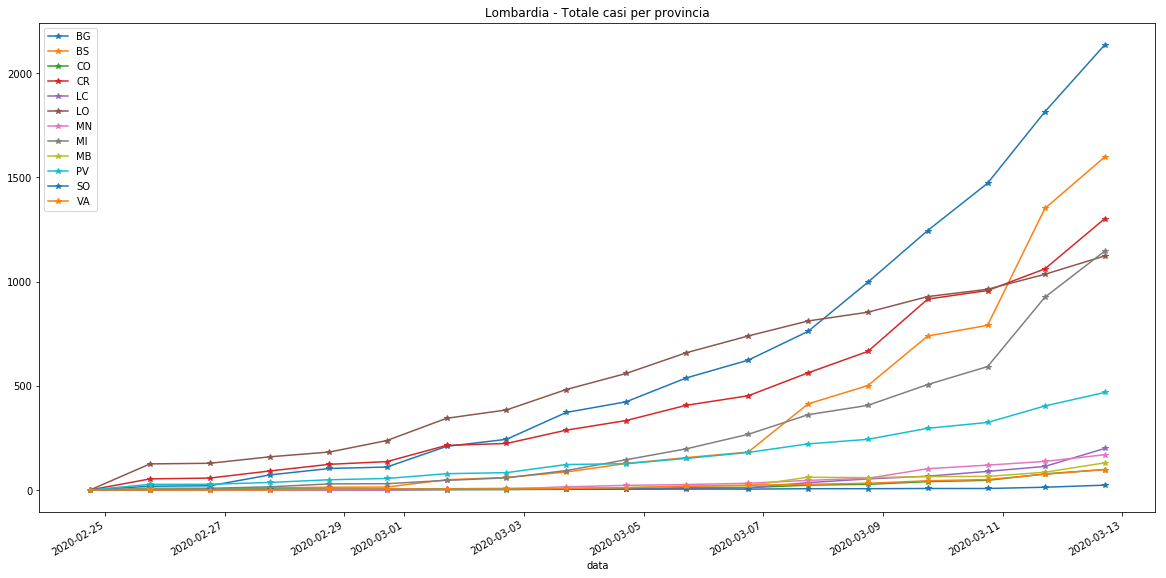

In [18]:
df = pd.DataFrame()
for p in df_prov[df_prov['denominazione_regione']=='Lombardia']['sigla_provincia'].unique()[:-1]:
    df[p] = df_prov[df_prov['sigla_provincia']==p]['totale_casi']
display(df.loc[df.index.unique()[-2:]])
df.plot(title='Lombardia - Totale casi per provincia', style='*-')
plt.legend(loc='upper left')
plt.show()

## Italia

### Complessivo

,totale_attualmente_positivi,isolamento_domiciliare,ricoverati_con_sintomi,terapia_intensiva,deceduti
data,,,,,
2020-03-11 17:00:00,10590,3724,5838,1028,827
2020-03-12 17:00:00,12839,5036,6650,1153,1016


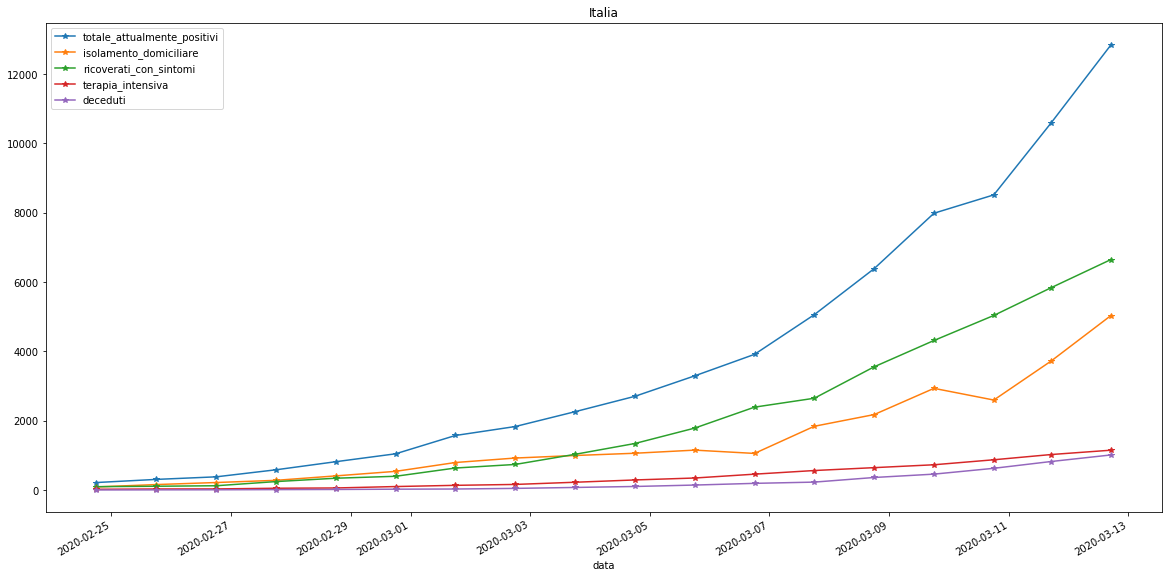

In [21]:
df_naz.plot(y=['totale_attualmente_positivi',
               'isolamento_domiciliare',
               'ricoverati_con_sintomi',
               'terapia_intensiva',
               'deceduti'],
            title='Italia',
            style='*-')
display(df_naz.loc[df_naz.index.unique()[-2:],
                   ['totale_attualmente_positivi',
                    'isolamento_domiciliare',
                    'ricoverati_con_sintomi',
                    'terapia_intensiva',
                    'deceduti']])
plt.show()

### Dettaglio regioni

data,2020-03-11 17:00:00,2020-03-12 17:00:00
denominazione_regione,,
Abruzzo,38,84
Basilicata,8,8
Calabria,19,33
Campania,154,179
Emilia Romagna,1739,1947
Friuli Venezia Giulia,126,167
Lazio,150,200
Liguria,194,274
Lombardia,7280,8725


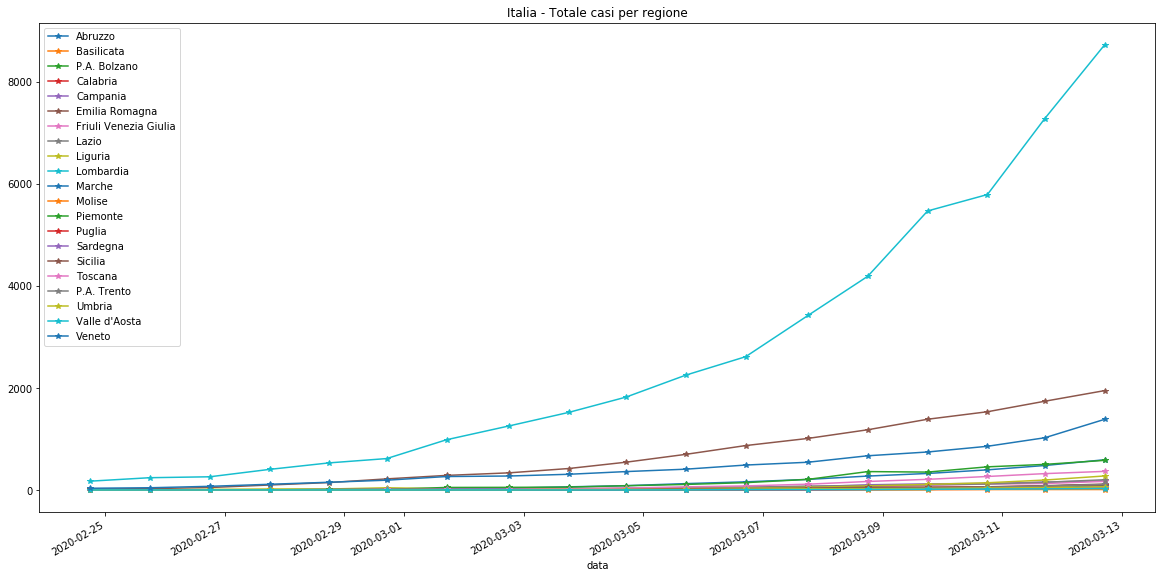

In [19]:
display(df_reg_raw.pivot(index='denominazione_regione',
                 columns='data',
                 values='totale_casi').iloc[:, -2:])
df = pd.DataFrame()
for p in df_reg['denominazione_regione']:
    df[p] = df_reg[df_reg['denominazione_regione']==p]['totale_casi']
df.plot(title='Italia - Totale casi per regione', style='*-')
plt.legend(loc='upper left')
plt.show()